In [1]:
!pip install ultralytics


     ---------------------------------------- 0.0/41.3 kB ? eta -:--:--
     ---------------------------- --------- 30.7/41.3 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 41.3/41.3 kB 501.6 kB/s eta 0:00:00


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/862.6 kB ? eta -:--:--
   - ------------------------------------- 41.0/862.6 kB 991.0 kB/s eta 0:00:01
   --- ------------------------------------ 81.9/862.6 kB 1.2 MB/s eta 0:00:01
   ---- --------------------------------- 112.6/862.6 kB 731.4 kB/s eta 0:00:02
   ---------- ----------------------------- 225.3/862.6 kB 1.1 MB/s eta 0:00:01
   ----------- ---------------------------- 245.8/862.6 kB 1.3 MB/s eta 0:00:01
   ---------------- ----------------------- 358.4/862.6 kB 1.2 MB/s eta 0:00:01
   ----------------------- ---------------- 501.8/862.6 kB 1.5 MB/s eta 0:00:01
   ------------------------ --------------- 532.5/862.6 kB 1.4 MB/s eta 0:00:01
   ------------------------------- -------- 675.8/862.6 kB 1.6 MB/s eta 0:00:01
   ----------------------------------- ---- 757.8/862.6 kB 1.7 MB/s eta 0:00:01
   -------------------------------------- - 829.4/862.6 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 862.6

In [2]:
from ultralytics import YOLO

model = YOLO('yolov8s.pt')  # Load the small version of YOLOv8


100%|██████████| 21.5M/21.5M [00:09<00:00, 2.42MB/s]


In [3]:
from PIL import Image
import matplotlib.pyplot as plt

def upload_and_process_image(image_path):
    # Load image
    image = Image.open(image_path)
    
    # Run object detection
    results = model(image)
    
    # Plot the original image
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    return results


In [4]:
import cv2
import numpy as np

def generate_creative_art(results):
    for result in results:
        boxes = result.boxes  # Get bounding boxes of detected objects
        img = result.img  # Get the processed image

        # Create an artistic effect
        for box in boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get coordinates
            roi = img[y1:y2, x1:x2]  # Region of interest

            # Apply a Gaussian blur to the ROI
            roi = cv2.GaussianBlur(roi, (51, 51), 0)

            # Put the ROI back into the image
            img[y1:y2, x1:x2] = roi

    # Convert image to RGB format
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()



image 1/1 c:\Users\Hamza\Downloads\k.jpg: 448x640 2 persons, 1 bird, 1 sports ball, 23.9ms
Speed: 1.7ms preprocess, 23.9ms inference, 16.8ms postprocess per image at shape (1, 3, 448, 640)


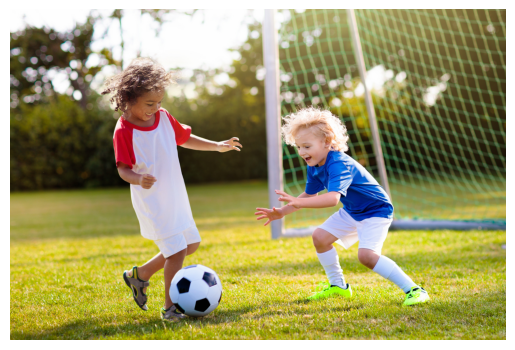

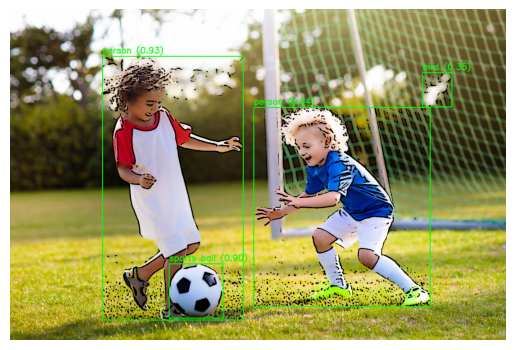

In [16]:
from ultralytics import YOLO
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load a pre-trained YOLOv8 model
model = YOLO('yolov8s.pt')

def upload_and_process_image(image_path):
    # Load image
    image = Image.open(image_path)
    
    # Run object detection
    results = model(image_path)
    
    # Plot the original image
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    return results

def apply_cartoon_effect(roi):
    # Apply a cartoon effect
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    gray = cv2.medianBlur(gray, 5)
    edges = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                  cv2.THRESH_BINARY, 9, 9)
    
    color = cv2.bilateralFilter(roi, 9, 250, 250)
    cartoon = cv2.bitwise_and(color, color, mask=edges)

    return cartoon

def generate_creative_art(results):
    img = results[0].orig_img  # Get the original image
    
    for result in results:
        boxes = result.boxes  # Get bounding boxes of detected objects

        for box in boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get coordinates
            roi = img[y1:y2, x1:x2]  # Region of interest

            # Apply a cartoon effect to the ROI
            roi_cartoon = apply_cartoon_effect(roi)

            # Put the ROI back into the image
            img[y1:y2, x1:x2] = roi_cartoon

            # Get the label and confidence score
            label = result.names[int(box.cls[0])]
            confidence = box.conf[0]

            # Draw the bounding box and label on the image
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            text = f"{label} ({confidence:.2f})"
            cv2.putText(img, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Convert image to RGB format
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

def main(image_path):
    results = upload_and_process_image(image_path)
    generate_creative_art(results)

# Example usage
image_path = r'c:\Users\Hamza\Downloads\k.jpg'  # Replace with your image path
main(image_path)
